In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import eurostat
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import pickle
import networkx as nx

plt.style.use("ggplot")

%load_ext jupyter_black

In [2]:
dataset_code = "NRG_INF_LBPC"
dict_siec = eurostat.get_dic(dataset_code, "siec", frmt="dict")

# Data download

In [3]:
df_dataset = eurostat.get_toc_df()
df_dataset.head()

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
2,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-05-03T23:00:00+0200,2024-03-26T23:00:00+0100,1997-Q1,2023-Q4
3,Gross weight of goods handled in main ports by...,MAR_GO_QMC,dataset,2024-05-03T23:00:00+0200,2024-03-26T23:00:00+0100,1997-Q1,2023-Q4
4,Gross weight of goods transported to/from main...,MAR_GO_QM_BE,dataset,2024-03-26T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q3


In [4]:
df_dataset[df_dataset.code == "NRG_INF_LBPC"]

,title,code,type,last update of data,last table structure change,data start,data end
937,Liquid biofuels production capacities,NRG_INF_LBPC,dataset,2024-04-16T23:00:00+0200,2024-04-16T23:00:00+0200,1990,2022


In [5]:
parameters = eurostat.get_pars(dataset_code)
parameters

['freq', 'siec', 'plant_tec', 'unit', 'geo']

In [6]:
for parameter in parameters:
    print(parameter)
    values = eurostat.get_par_values(dataset_code, parameter)
    print(values)

freq
['A']
siec
['R5210P', 'R5220P', 'R5230P', 'R5290']
plant_tec
['CAP_PRD']
unit
['THS_TY']
geo
['EU27_2020', 'EA20', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'IS', 'LI', 'NO', 'UK', 'BA', 'ME', 'MD', 'MK', 'GE', 'AL', 'RS', 'TR', 'UA', 'XK']


In [7]:
dic = eurostat.get_dic(dataset_code)
dic

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('siec',
  'Standard international energy product classification (SIEC)',
  'This code list contains the energy products according to the Standard International Energy Product Classification (SIEC) which has been developped as part of the International Recommendations for Energy Statistics (IRES) adopted by the UNSD.'),
 ('plant_tec',
  'Technical characteristics of plants',
  'This code list refers to the technical characteristics of a plant, such as capacity or production specificities.'),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

## Dataframe

In [8]:
df = eurostat.get_data_df(dataset_code)
df.head()

,freq,siec,plant_tec,unit,geo\TIME_PERIOD,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,R5210P,CAP_PRD,THS_TY,AL,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,R5210P,CAP_PRD,THS_TY,AT,0.0,0.0,0.0,0.0,0.0,...,191.0,210.0,210.0,220.5,220.5,220.5,220.5,220.5,220.5,220.5
2,A,R5210P,CAP_PRD,THS_TY,BA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,R5210P,CAP_PRD,THS_TY,BE,0.0,0.0,0.0,0.0,0.0,...,369.0,369.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0
4,A,R5210P,CAP_PRD,THS_TY,BG,0.0,0.0,0.0,0.0,0.0,...,21.9,24.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,30.0


In [9]:
df["siec_name"] = df.siec.replace(dict_siec)
df = df.rename(columns={"geo\TIME_PERIOD": "geo"})
df = df[
    [
        "freq",
        "siec",
        "siec_name",
        "plant_tec",
        "unit",
        "geo",
        "1990",
        "1991",
        "1992",
        "1993",
        "1994",
        "1995",
        "1996",
        "1997",
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]
df

,freq,siec,siec_name,plant_tec,unit,geo,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,R5210P,Pure biogasoline,CAP_PRD,THS_TY,AL,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,R5210P,Pure biogasoline,CAP_PRD,THS_TY,AT,0.0,0.0,0.0,0.0,...,191.0,210.0,210.0,220.5,220.5,220.5,220.5,220.5,220.5,220.5
2,A,R5210P,Pure biogasoline,CAP_PRD,THS_TY,BA,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,R5210P,Pure biogasoline,CAP_PRD,THS_TY,BE,0.0,0.0,0.0,0.0,...,369.0,369.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0
4,A,R5210P,Pure biogasoline,CAP_PRD,THS_TY,BG,0.0,0.0,0.0,0.0,...,21.9,24.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,A,R5290,Other liquid biofuels,CAP_PRD,THS_TY,SK,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,A,R5290,Other liquid biofuels,CAP_PRD,THS_TY,TR,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,A,R5290,Other liquid biofuels,CAP_PRD,THS_TY,UA,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
170,A,R5290,Other liquid biofuels,CAP_PRD,THS_TY,UK,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [10]:
df.to_csv(f"data/{dataset_code}.csv")

## Dataset

In [11]:
df = pd.read_csv(f"data/{dataset_code}.csv", index_col=0)
df = df[df.unit == "THS_TY"]
df = df.set_index(["siec_name", "geo"])[
    [
        "1990",
        "1991",
        "1992",
        "1993",
        "1994",
        "1995",
        "1996",
        "1997",
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]
df.columns = pd.to_datetime(df.columns)
df.columns.name = "Year"
df.head()

Year                  1990-01-01  1991-01-01  1992-01-01  1993-01-01  \
siec_name        geo                                                   
Pure biogasoline AL          0.0         0.0         0.0         0.0   
                 AT          0.0         0.0         0.0         0.0   
                 BA          NaN         NaN         NaN         NaN   
                 BE          0.0         0.0         0.0         0.0   
                 BG          0.0         0.0         0.0         0.0   

Year                  1994-01-01  1995-01-01  1996-01-01  1997-01-01  \
siec_name        geo                                                   
Pure biogasoline AL          0.0         0.0         0.0         0.0   
                 AT          0.0         0.0         0.0         0.0   
                 BA          NaN         NaN         NaN         NaN   
                 BE          0.0         0.0         0.0         0.0   
                 BG          0.0         0.0         0.0         0.0   

Year                  1998-01-01  1999-01-01  ...  2013-01-01  2014-01-01  \
siec_name        geo                          ...                           
Pure biogasoline AL          0.0         0.0  ...         0.0         0.0   
                 AT          0.0         0.0  ...       191.0       210.0   
                 BA          NaN         NaN  ...         NaN         0.0   
                 BE          0.0         0.0  ...       369.0       369.0   
                 BG          0.0         0.0  ...        21.9        24.0   

Year                  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
siec_name        geo                                                   
Pure biogasoline AL          0.0         0.0         0.0         0.0   
                 AT        210.0       220.5       220.5       220.5   
                 BA          0.0         0.0         0.0         0.0   
                 BE        408.0       408.0       408.0       408.0   
                 BG         26.0        27.0        27.0        27.0   

Year                  2019-01-01  2020-01-01  2021-01-01  2022-01-01  
siec_name        geo                                                  
Pure biogasoline AL          0.0         0.0         0.0         0.0  
                 AT        220.5       220.5       220.5       220.5  
                 BA          0.0         0.0         0.0         0.0  
                 BE        408.0       408.0       408.0       408.0  
                 BG         27.0        27.0        27.0        30.0  

[5 rows x 33 columns]

In [12]:
ds = df.stack().to_xarray()
ds = ds.rename({"siec_name": "Energy", "geo": "Country"})
ds

<xarray.DataArray (Energy: 4, Country: 43, Year: 33)> Size: 45kB
array([[[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [ 28. ,  28. ,  28. , ..., 645.5, 645.5, 645.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. , 200. , 200. ],
        [ 28. ,  28. ,  28. , ..., 645.5, 645.5, 645.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ..., 220.5, 220.5, 220.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]]])
Coordinates:
  * Energy   (Energy) object 32B 'Other liquid biofuels' ... 'Pure biogasoline'
  * Country  (Country) object 344B 'AL' 'AT' 'BA' 'BE' ... 'TR' 'UA' 'UK' 'XK'
  * Year     (Year) datetime64[ns] 264B 1990-01-01 1991-01-01 ... 2022-01-01

In [13]:
ds.to_netcdf(f"data/{dataset_code}.nc")

# Plot

In [14]:
ds = xr.load_dataarray(f"data/{dataset_code}.nc")
ds

<xarray.DataArray (Energy: 4, Country: 43, Year: 33)> Size: 45kB
array([[[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [ 28. ,  28. ,  28. , ..., 645.5, 645.5, 645.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. , 200. , 200. ],
        [ 28. ,  28. ,  28. , ..., 645.5, 645.5, 645.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. , ..., 220.5, 220.5, 220.5],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ],
        ...,
        [  0. ,   0. ,   0. , ...,   0. ,   nan,   nan],
        [  0. ,   0. ,   0. , ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   0. ,   0. ,   0. ]]])
Coordinates:
  * Country  (Country) object 344B 'AL' 'AT' 'BA' 'BE' ... 'TR' 'UA' 'UK' 'XK'
  * Year     (Year) datetime64[ns] 264B 1990-01-01 1991-01-01 ... 2022-01-01
  * Energy   (Energy) object 32B 'Other liquid biofuels' ... 'Pure biogasoline'

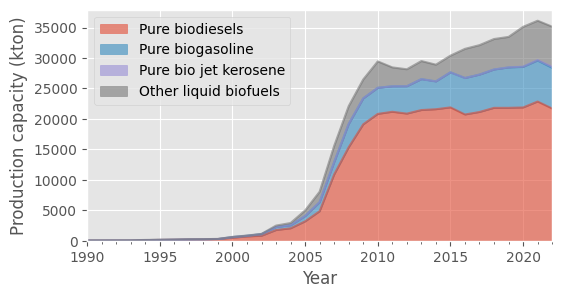

In [24]:
dfp = ds.sel(Country="EU27_2020").to_dataset("Energy").to_dataframe()

fig, ax = plt.subplots(figsize=(6, 3))
dfp[
    [
        "Pure biodiesels",
        "Pure biogasoline",
        "Pure bio jet kerosene",
        "Other liquid biofuels",
    ]
].plot(ax=ax, kind="area", alpha=0.6)
ax.set_ylabel("Production capacity (kton)")
plt.savefig("plot/figure18.png")